<a href="https://colab.research.google.com/github/sznajder/Lectures/blob/master/Plot_CSC_muon_hits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!fusermount -u drive

fusermount: failed to unmount /content/drive: No such file or directory


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
!pip install uproot


In [0]:
import uproot
import numpy as np
import pandas as pd
import h5py
import random 

!ls 'gdrive/My Drive/Colab Notebooks/Data'
path = 'gdrive/My Drive/Colab Notebooks/Data'
file_muon   = path+'/ntuple_SingleMuon_Endcap_9.root'
file_pileup = path+'/ntuple_SingleNeutrino_PU200_63.root'
upfile_muon = uproot.open(file_muon)
upfile_pileup = uproot.open(file_pileup)
tree_muon = upfile_muon["ntupler"]["tree"] # dictionary of NumPy arrays
tree_pileup = upfile_pileup["ntupler"]["tree"] # dictionary of NumPy arrays

upfile_muon.keys()
tree_muon.show()

_about.txt	   events.root		  ntuple_ggH_ZZ4mu.root
bolsas_astro.txt   GOOG.csv		  ntuple_qqH_ZZ4mu.root
bolsas_fisica.txt  jet_images.h5	  ntuple_SingleMuon_Endcap_9.root
deu.txt		   ntuple_bkg_ZZ4mu.root  ntuple_SingleNeutrino_PU200_63.root
vh_endcap                  TStreamerSTL               asjagged(asdtype('>i2'), 10)
vh_station                 TStreamerSTL               asjagged(asdtype('>i2'), 10)
vh_ring                    TStreamerSTL               asjagged(asdtype('>i2'), 10)
vh_sector                  TStreamerSTL               asjagged(asdtype('>i2'), 10)
vh_subsector               TStreamerSTL               asjagged(asdtype('>i2'), 10)
vh_chamber                 TStreamerSTL               asjagged(asdtype('>i2'), 10)
vh_cscid                   TStreamerSTL               asjagged(asdtype('>i2'), 10)
vh_bx                      TStreamerSTL               asjagged(asdtype('>i2'), 10)
vh_type                    TStreamerSTL               asjagged(asdtype('>i2'), 10)
vh_neighbor

**Convert the Root branches/leaves directly to Pandas dataframe**

In [0]:
# Convert the Root branches/leaves directly to Pandas dataframe 
VARS = ['ve_event','vh_size','vh_sim_z','vh_sim_r','vh_sim_phi', 'vh_sim_eta', 'vh_sim_theta', 'vh_sector']
events = {}
events['muon']   = tree_muon.pandas.df(VARS,flatten=False)
events['pileup'] = tree_pileup.pandas.df(VARS,flatten=False)
nmuon = len(events['muon'])
npileup = len(events['pileup'])
print('nmuon=',nmuon)
print('npileup=',npileup)
print('Local Phi=',events['muon'].vh_sim_phi)

nmuon= 20000
npileup= 2400
Local Phi= entry
0        [-28.88641, -24.495155, -28.999249, -29.989435...
1        [63.043896, 59.320133, 62.162495, 58.604313, 5...
2        [-174.8894, -173.49353, -174.71272, -173.52611...
3        [108.129486, 108.11816, 107.86926, 107.96447, ...
4        [99.28072, 102.01643, 97.261856, 102.07002, 10...
                               ...                        
19995    [-153.27599, -155.27397, -152.72394, -155.6653...
19996    [102.94256, 102.092064, 105.38355, 101.52323, ...
19997    [-74.79965, -74.73057, -74.85261, -74.86567, -...
19998                  [-50.080685, -49.26671, -50.080685]
19999    [126.058685, 123.85597, 125.12744, 122.731285,...
Name: vh_sim_phi, Length: 20000, dtype: object


**Plot of CSC muon hits in XxY transverse plane**

---



Initializing random seed=1
Ievt= 0  Ipileup= 551
 
Event # 0
# muon hits= 5
# pileup hits= 50
# merged hits= 55


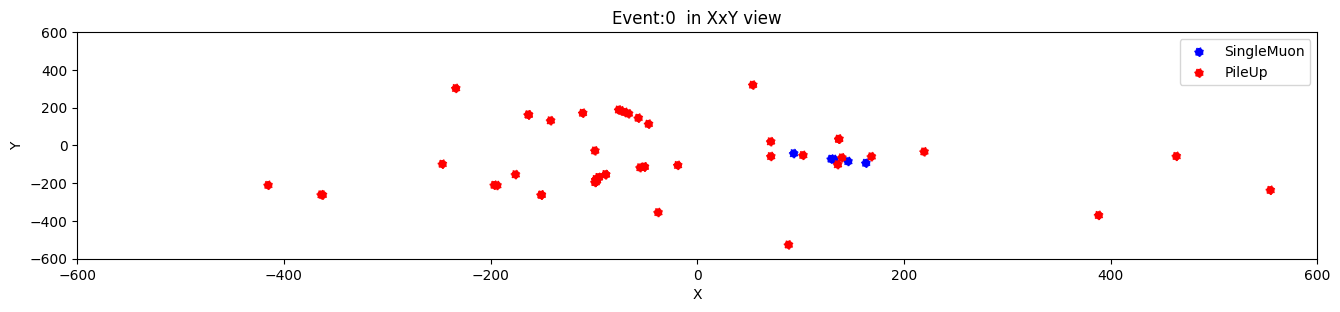

Ievt= 1  Ipileup= 2332
 
Event # 1
# muon hits= 8
# pileup hits= 14
# merged hits= 22


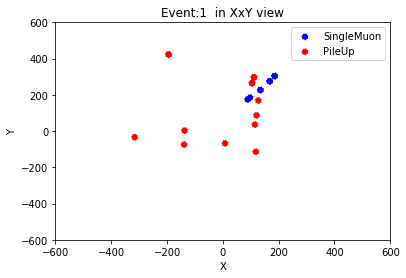

Ievt= 2  Ipileup= 259
 
Event # 2
# muon hits= 20
# pileup hits= 39
# merged hits= 59


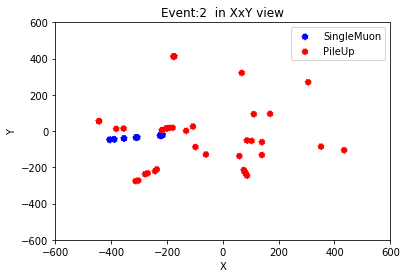

Ievt= 3  Ipileup= 1045
 
Event # 3
# muon hits= 8
# pileup hits= 77
# merged hits= 85


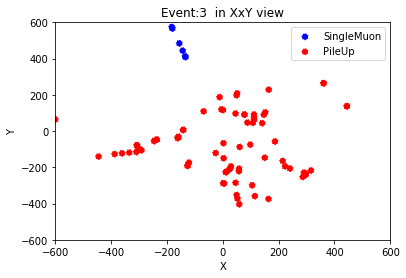

Ievt= 4  Ipileup= 483
 
Event # 4
# muon hits= 8
# pileup hits= 67
# merged hits= 75


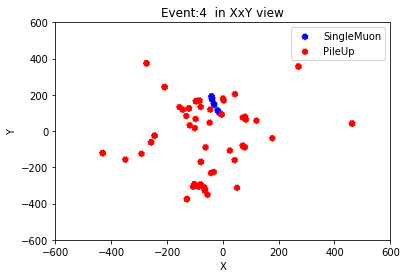

Ievt= 5  Ipileup= 2030
 
Event # 5
# muon hits= 14
# pileup hits= 46
# merged hits= 60


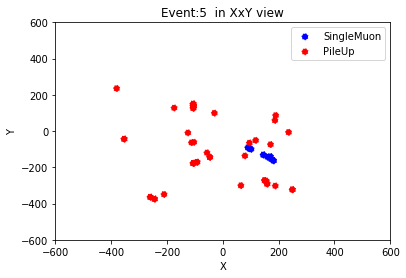

Ievt= 6  Ipileup= 1842
 
Event # 6
# muon hits= 8
# pileup hits= 38
# merged hits= 46


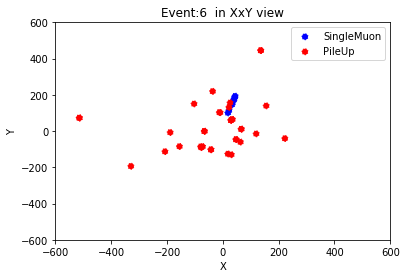

Ievt= 7  Ipileup= 1935
 
Event # 7
# muon hits= 14
# pileup hits= 37
# merged hits= 51


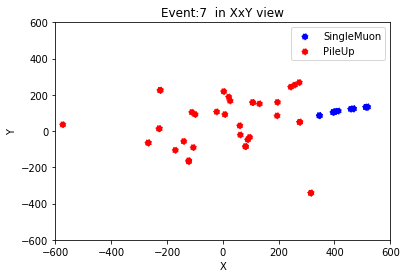

Ievt= 8  Ipileup= 1555
 
Event # 8
# muon hits= 10
# pileup hits= 29
# merged hits= 39


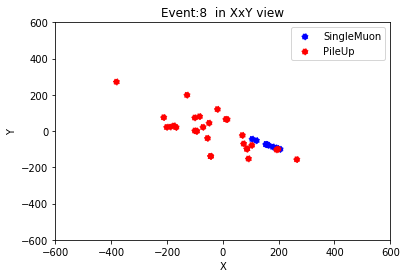

Ievt= 9  Ipileup= 860
 
Event # 9
# muon hits= 5
# pileup hits= 49
# merged hits= 54


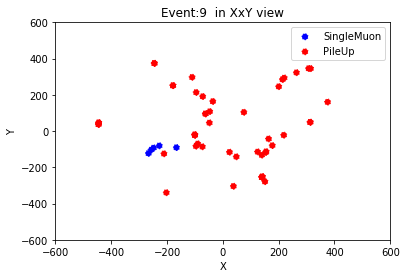

Ievt= 10  Ipileup= 385
 
Event # 10
# muon hits= 7
# pileup hits= 57
# merged hits= 64


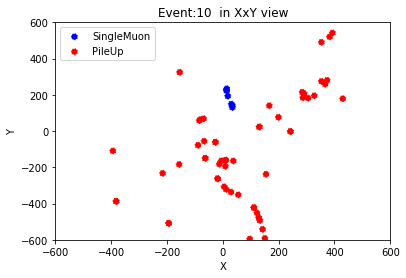

In [0]:
#Loop over events by iterating over dataframe rows
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 3),dpi=100)
# Max number of events to plot hits
nmax=10
print ("Initializing random seed=1")
random.seed(1)

for ievt, event_muon in events['muon'].iterrows():

  # Pick a random pileup event
  j = random.randint(1,npileup)
  event_pileup = events['pileup'].iloc[j]
  print ('Ievt=',ievt,' Ipileup=',j)
 
  # Merge muon and pileup hits arrays
  vh_sim_z = np.append( event_muon.vh_sim_z , event_pileup.vh_sim_z )
  vh_sim_r = np.append( event_muon.vh_sim_r , event_pileup.vh_sim_r )
  
#  print('# muon eta=',event_muon.vh_sim_eta)
#  print('# muon z=',event_muon.vh_sim_z)
#  print('# muon phi=',event_muon.vh_sim_phi)
#  print('# muon sect=',event_muon.vh_sector)
  
  print(' ')
  print('Event #',ievt )
  print('# muon hits=',len(event_muon.vh_sim_z))
  print('# pileup hits=',len(event_pileup.vh_sim_z))
  print('# merged hits=',len(vh_sim_z))

# Convert from local PHI go global CMS PHI
#  phi_muon_cms=(event_muon.vh_sim_phi/60.)-7 + (event_muon.vh_sector-1)*60.
#  phi_muon=phi_muon_cms*(np.pi/180.)
#  phi_pileup_cms=(event_pileup.vh_sim_phi/60.)-7 + (event_pileup.vh_sector-1)*60.
#  phi_pileup=phi_pileup_cms*(np.pi/180.)

  phi_muon = event_muon.vh_sim_phi*(np.pi/180.)
  phi_pileup = event_pileup.vh_sim_phi*(np.pi/180.)



# Get hits transverse cartesian coordinates XxY 
  y_muon=event_muon.vh_sim_r*np.sin(phi_muon)
  x_muon=event_muon.vh_sim_r*np.cos(phi_muon)
  y_pileup=event_pileup.vh_sim_r*np.sin(phi_pileup)
  x_pileup=event_pileup.vh_sim_r*np.cos(phi_pileup)

# Plots in transverse XxY plane 
  plt.scatter(x_muon, y_muon,color='b', linestyle='dotted', linewidth=1, label='SingleMuon')
#  plt.plot(x_muon, y_muon,color='blue', linestyle='dotted', linewidth=1, label='SingleMuon')
  plt.scatter(x_pileup, y_pileup,color='red', linestyle='dotted', linewidth=1, label='PileUp')
#  plt.plot(x_pileup, y_pileup,color='red', linestyle='dotted', linewidth=1, label='PileUp')
 
  #print(name, ievt)
  plt.title('Event:'+str(ievt)+'  in XxY view')
  plt.xlim(-600,600)
  plt.ylim(-600,600)
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend()
  plt.show()

  name = 'x_y_event'+ str(ievt) + '_new.png'
  plt.savefig(name)
  plt.close()

# Decide if it's time to end loop of events  
  if (ievt==nmax): break
  

**Plots of CSC muon hits in RxZ longitudinal plane for each CSC sector**

Initializing random seed=1
Ievt= 0  Ipileup= 551
 
Event # 0
# muon hits= 5
# pileup hits= 50
# merged hits= 55


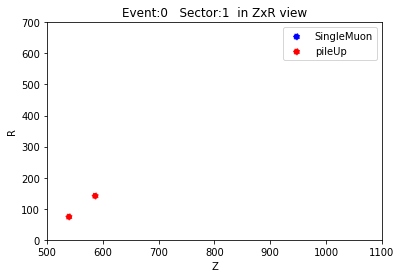

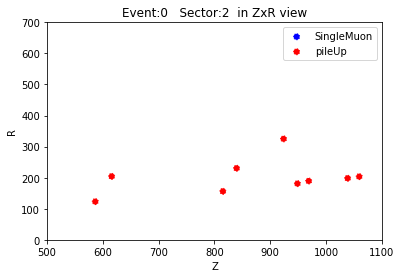

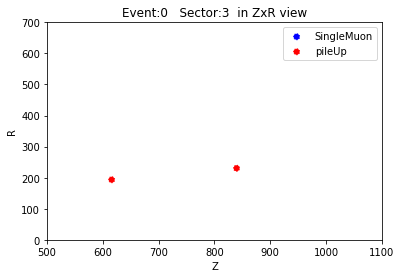

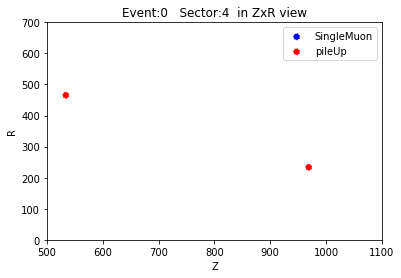

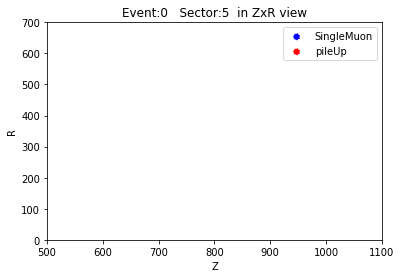

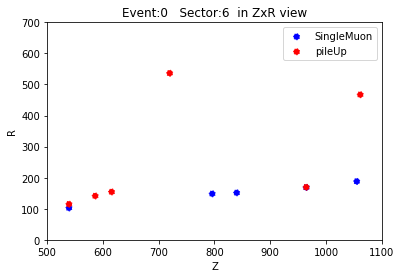

Ievt= 1  Ipileup= 2332
 
Event # 1
# muon hits= 8
# pileup hits= 14
# merged hits= 22


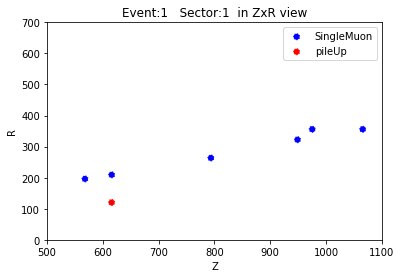

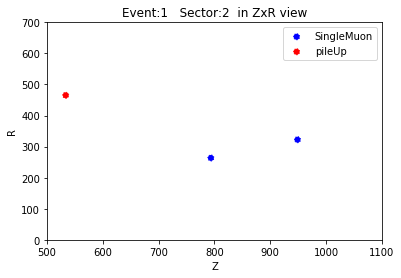

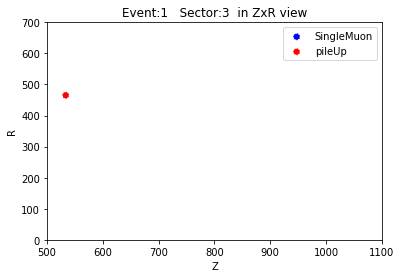

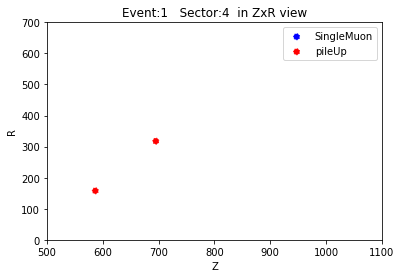

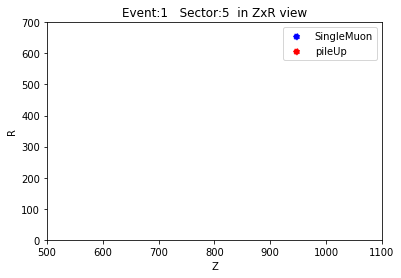

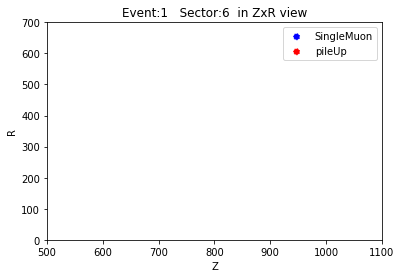

Ievt= 2  Ipileup= 259
 
Event # 2
# muon hits= 20
# pileup hits= 39
# merged hits= 59


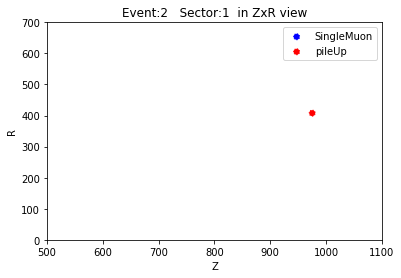

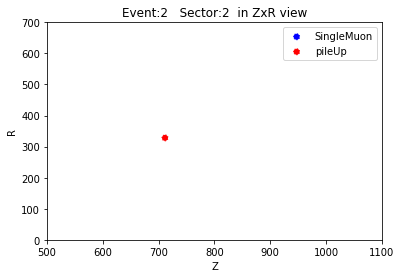

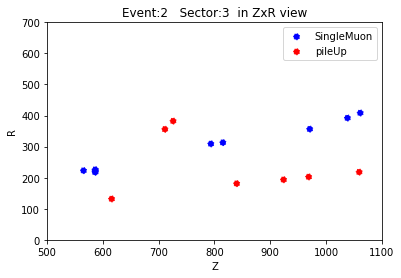

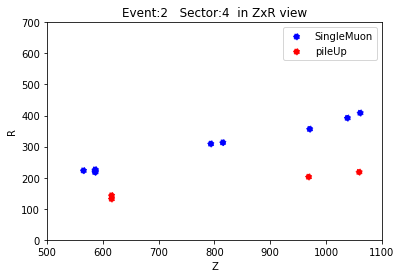

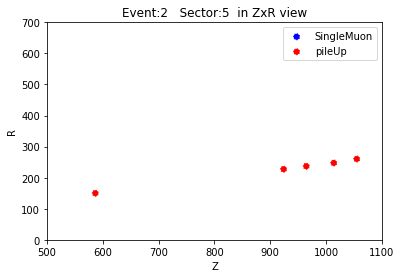

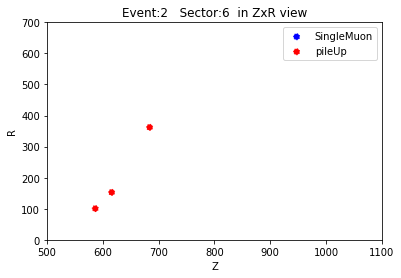

Ievt= 3  Ipileup= 1045
 
Event # 3
# muon hits= 8
# pileup hits= 77
# merged hits= 85


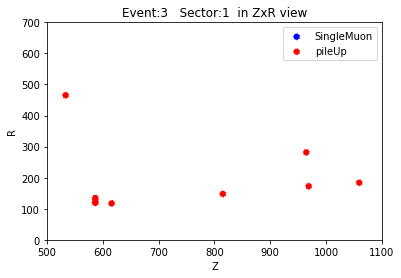

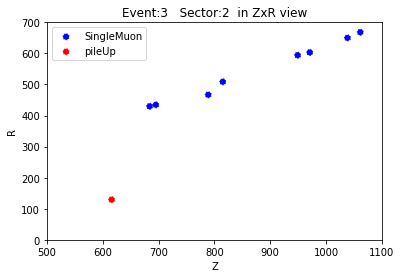

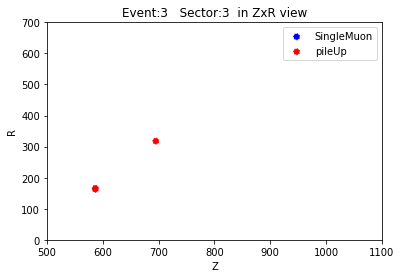

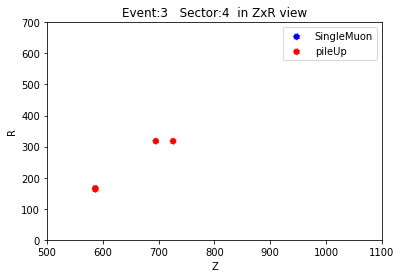

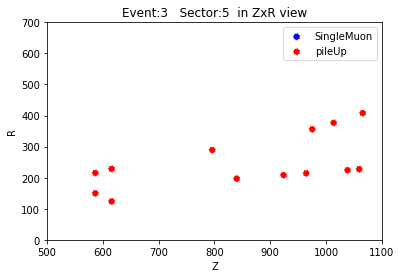

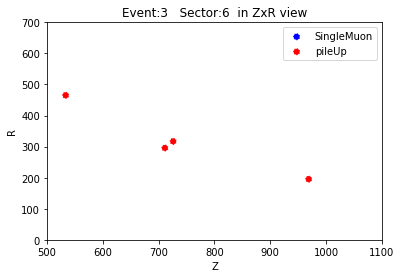

Ievt= 4  Ipileup= 483
 
Event # 4
# muon hits= 8
# pileup hits= 67
# merged hits= 75


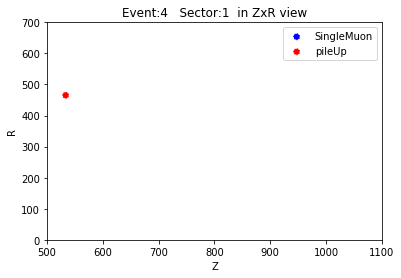

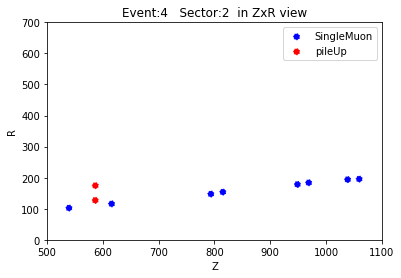

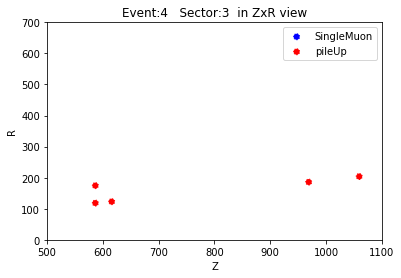

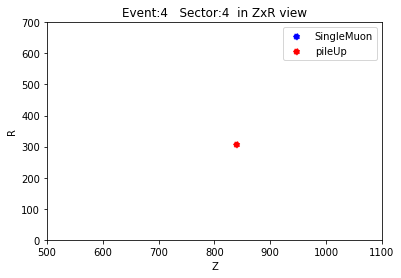

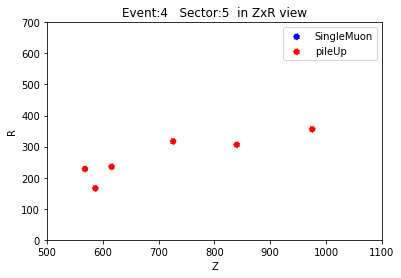

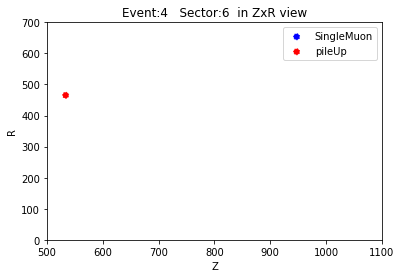

Ievt= 5  Ipileup= 2030
 
Event # 5
# muon hits= 14
# pileup hits= 46
# merged hits= 60


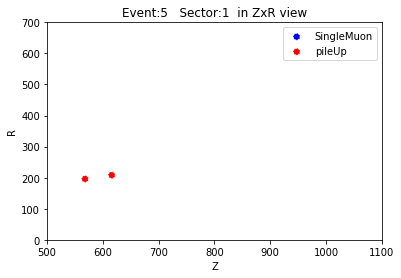

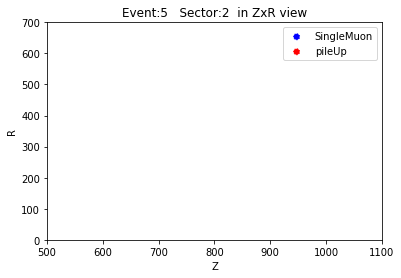

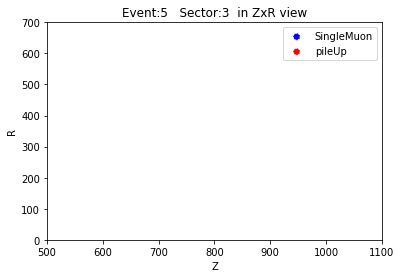

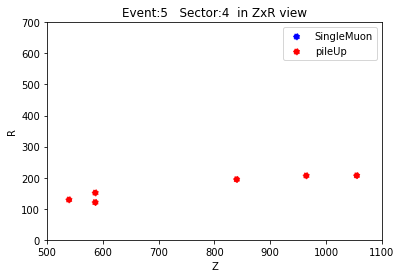

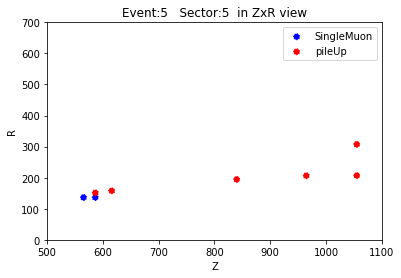

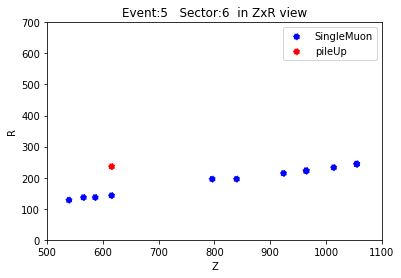

Ievt= 6  Ipileup= 1842
 
Event # 6
# muon hits= 8
# pileup hits= 38
# merged hits= 46


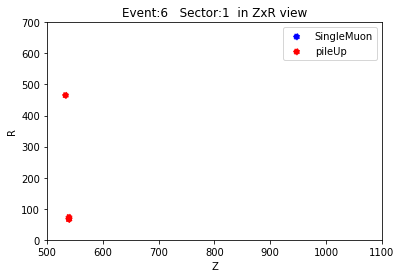

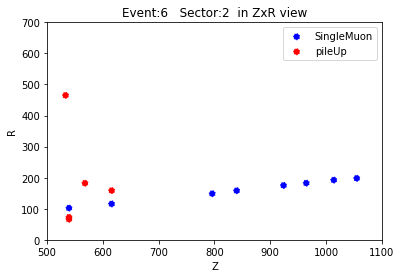

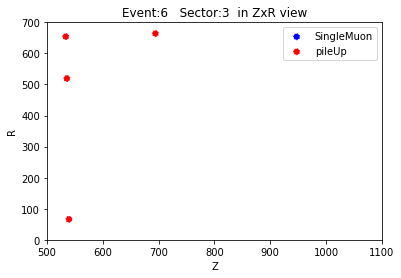

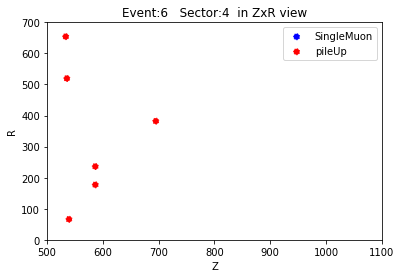

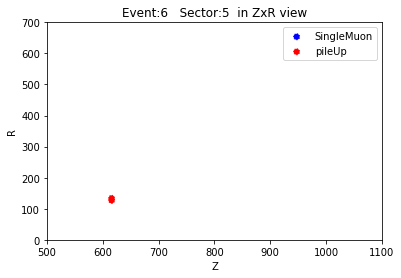

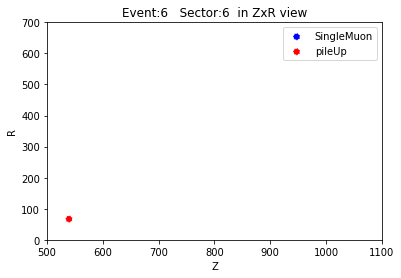

Ievt= 7  Ipileup= 1935
 
Event # 7
# muon hits= 14
# pileup hits= 37
# merged hits= 51


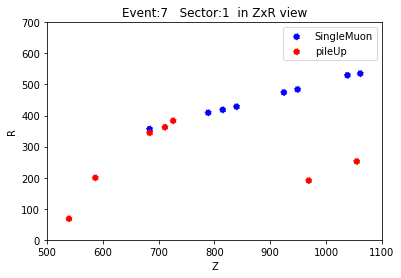

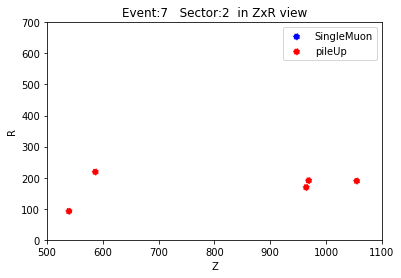

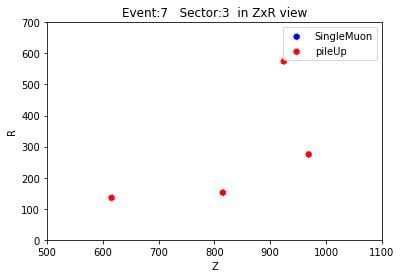

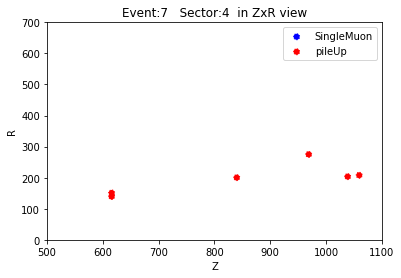

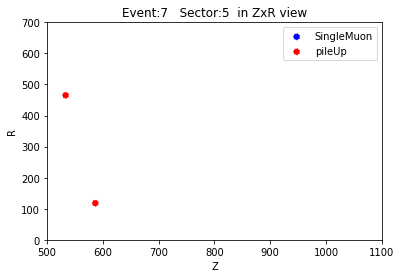

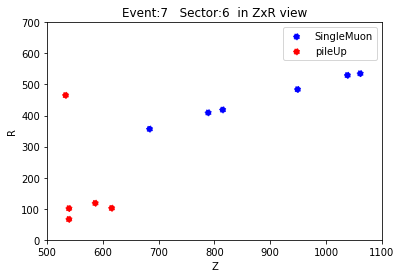

Ievt= 8  Ipileup= 1555
 
Event # 8
# muon hits= 10
# pileup hits= 29
# merged hits= 39


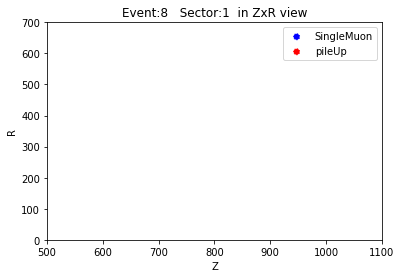

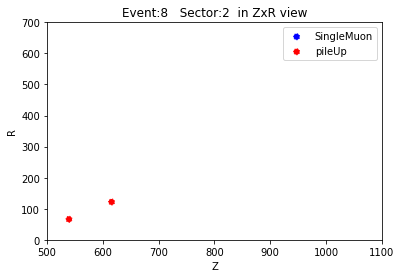

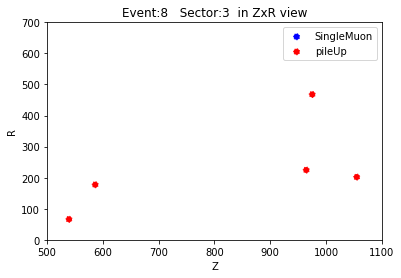

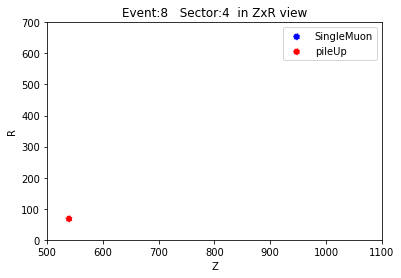

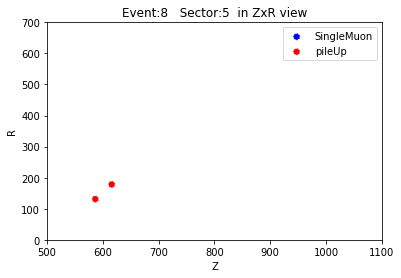

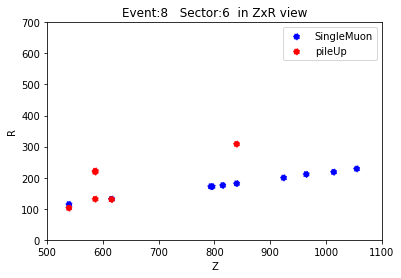

Ievt= 9  Ipileup= 860
 
Event # 9
# muon hits= 5
# pileup hits= 49
# merged hits= 54


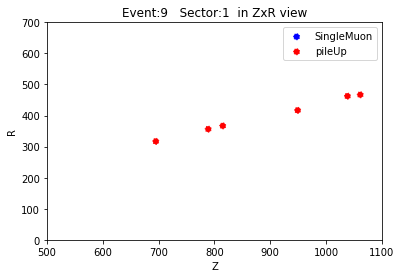

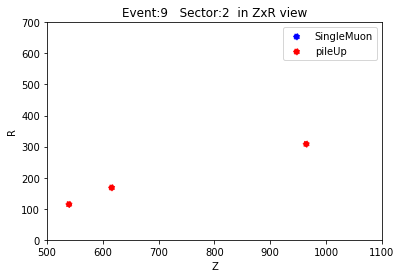

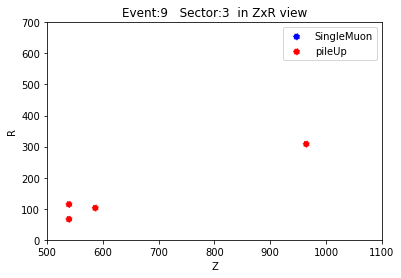

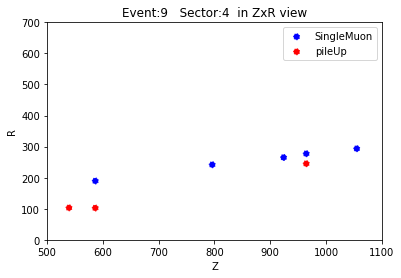

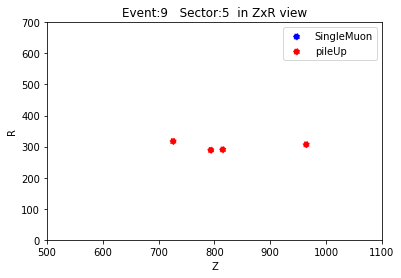

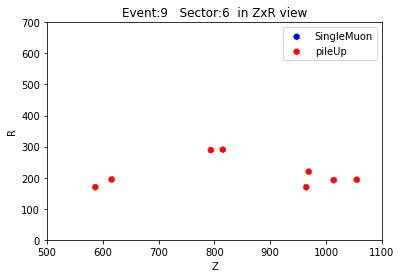

Ievt= 10  Ipileup= 385
 
Event # 10
# muon hits= 7
# pileup hits= 57
# merged hits= 64


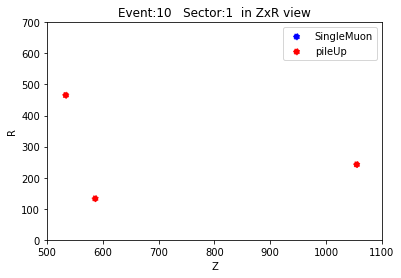

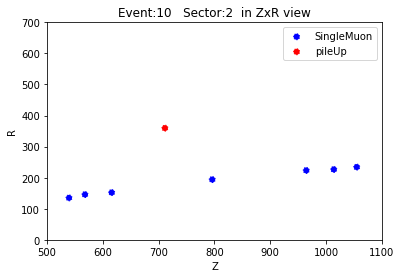

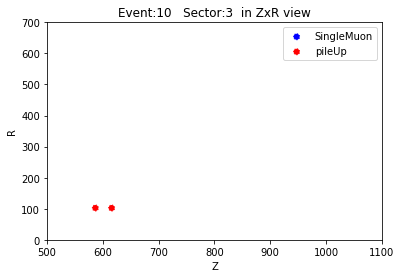

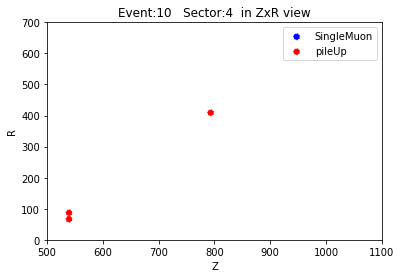

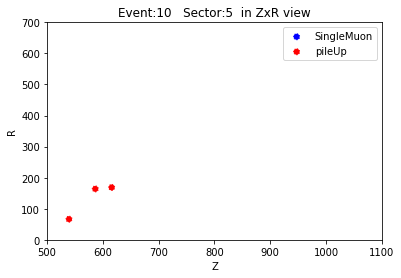

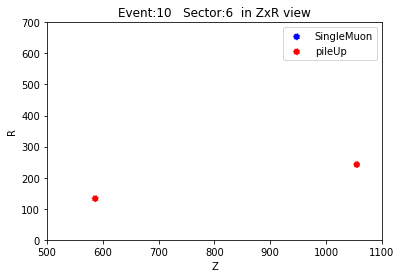

In [0]:
# Loop over events
nmax=10
print('Initializing random seed=1')
random.seed(1)

for ievt, event_muon in events['muon'].iterrows():
  
  # Pick a random pileup event
  j = random.randint(1,npileup)
  event_pileup = events['pileup'].iloc[j]
  print ('Ievt=',ievt,' Ipileup=',j)
  
  #Merge muon and pileup hits array
  vh_sim_z=np.append(event_muon.vh_sim_z, event_pileup.vh_sim_z)
  vh_sim_r=np.append(event_muon.vh_sim_r, event_pileup.vh_sim_r)
  vh_size=np.append(event_muon.vh_size, event_pileup.vh_size)

  print(' ')
  print('Event #',ievt )
  print('# muon hits=',len(event_muon.vh_sim_z))
  print('# pileup hits=',len(event_pileup.vh_sim_z))
  print('# merged hits=',len(vh_sim_z))


  # Loop over CSC sectors
  for isec in range(1,7):
    # Plot hits in RxZ plane for a given CSC sector
    plt.scatter(event_muon.vh_sim_z[event_muon.vh_sector==isec], event_muon.vh_sim_r[event_muon.vh_sector==isec],color='blue', linestyle='dotted', linewidth=1, label='SingleMuon')
#    plt.plot(event_muon.vh_sim_z[event_muon.vh_sector==isec],event_muon.vh_sim_r[event_muon.vh_sector==isec], color='blue', linestyle='dotted', linewidth=1)
    plt.scatter(event_pileup.vh_sim_z[event_pileup.vh_sector==isec], event_pileup.vh_sim_r[event_pileup.vh_sector==isec],color='red', linestyle='dotted', linewidth=1, label='pileUp')
#    plt.plot(event_pileup.vh_sim_z[event_pileup.vh_sector==isec], event_pileup.vh_sim_r[event_pileup.vh_sector==isec],color='red', linestyle='dotted', linewidth=1)

    plt.xlim(500,1100)
    plt.ylim(0,700)
    plt.xlabel('Z')
    plt.ylabel('R')
    plt.legend()
    plt.title('Event:'+str(ievt)+'   Sector:'+str(isec)+'  in ZxR view')
    plt.show()

    name = 'r_z_event'+ str(ievt) +'_sec_'+str(isec)+ '_new.png'
    plt.savefig(name)
    plt.close()

  # End loop over events 
  if (ievt==nmax): break